In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 23_03_2022 07_34_00.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 16_03_2022 07_33_42.xlsx')

In [5]:
filtrado = dados[['escolaridade','RacaCor','Classificacao final','Evolucao']]
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado['escolaridade'] = filtrado['escolaridade'].map({'Ignorado':'Ignorado/Sem informação','Não informado':'Ignorado/Sem informação','Fund 1º ciclo (1ª a 5ª série)':'Fund 1 (1ª a 5ª série)',
                                                        'Fund 2º   ciclo (6ª a9ª série)':'Fund 2 (6ª a 9ª série)','Médio (1º ao 3º ano)':'Médio (1° ao 3° ano)',
                                                        'Sem escolaridade/Analfabeto':'Sem escolaridade/Analfabeto','Superior':'Superior'})
filtrado

,escolaridade,RacaCor,Classificacao final,Evolucao
11,Ignorado/Sem informação,Branca,COVID-19,Cura
17,Superior,Branca,COVID-19,Cura
18,Ignorado/Sem informação,Branca,COVID-19,Cura
19,Superior,Branca,COVID-19,Cura
23,Ignorado/Sem informação,Branca,COVID-19,Cura
...,...,...,...,...
168335,NaN,Branca,COVID-19,Óbito
168336,NaN,Branca,COVID-19,Óbito
168337,NaN,Branca,COVID-19,Óbito
168338,NaN,Branca,COVID-19,Óbito


In [6]:
numerador = filtrado.loc[filtrado['Evolucao']=='Óbito']
numerador = numerador.groupby('escolaridade').count()
numerador

,RacaCor,Classificacao final,Evolucao
escolaridade,,,
Fund 1 (1ª a 5ª série),5436,5441,5441
Fund 2 (6ª a 9ª série),4169,4172,4172
Ignorado/Sem informação,7292,7306,7306
Médio (1° ao 3° ano),3280,3281,3281
Sem escolaridade/Analfabeto,723,723,723
Superior,1243,1243,1243


In [7]:
denominador = filtrado
denominador['Evolucao'] = denominador['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'})
denominador = denominador.loc[denominador['Evolucao']=='Óbito/Cura']
denominador = denominador.groupby('escolaridade').count()
denominador

,RacaCor,Classificacao final,Evolucao
escolaridade,,,
Fund 1 (1ª a 5ª série),14404,14420,14420
Fund 2 (6ª a 9ª série),12851,12861,12861
Ignorado/Sem informação,19017,19051,19051
Médio (1° ao 3° ano),14238,14259,14259
Sem escolaridade/Analfabeto,1587,1589,1589
Superior,6118,6127,6127


In [8]:
calculo = numerador['Evolucao']/denominador['Evolucao']*100
calculo = calculo.to_frame()
calculo = calculo.reset_index()
calculo

,escolaridade,Evolucao
0,Fund 1 (1ª a 5ª série),37.732316
1,Fund 2 (6ª a 9ª série),32.439157
2,Ignorado/Sem informação,38.349693
3,Médio (1° ao 3° ano),23.010029
4,Sem escolaridade/Analfabeto,45.500315
5,Superior,20.287253


In [9]:
ordena = calculo.copy()
ordena.loc[0] = calculo.loc[2]
ordena.loc[1] = calculo.loc[5]
ordena.loc[2] = calculo.loc[3]
ordena.loc[3] = calculo.loc[1]
ordena.loc[4] = calculo.loc[0]
ordena.loc[5] = calculo.loc[4]
ordena['Evolucao'] = round(ordena['Evolucao'],0)
ordena['Evolucao'] = ordena['Evolucao'].astype(int)
ordena['escolaridade'] = ordena['escolaridade'].map({'Ignorado/Sem informação':'Ignorado/sem informação','Superior':'Superior','Médio (1° ao 3° ano)':'Médio (1° ao 3° ano)',
                                                                   'Fund 2 (6ª a 9ª série)':'Fund 2 (6ª a 9ª série)','Fund 1 (1ª a 5ª série)':'Fund 1 (1ª a 5ª série)',
                                                                   'Sem escolaridade/Analfabeto':'Sem escolaridade/analfabeto'})
ordena

,escolaridade,Evolucao
0,Ignorado/sem informação,38
1,Superior,20
2,Médio (1° ao 3° ano),23
3,Fund 2 (6ª a 9ª série),32
4,Fund 1 (1ª a 5ª série),38
5,Sem escolaridade/analfabeto,46


In [10]:
escolaridade = ordena['escolaridade']

In [11]:
eixo_y = ordena['Evolucao']

In [12]:
legenda = pd.DataFrame(columns={'Letalidade hospitalar (% dos casos com evolucação que foram a óbito)'})

In [13]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 23_3_2022'

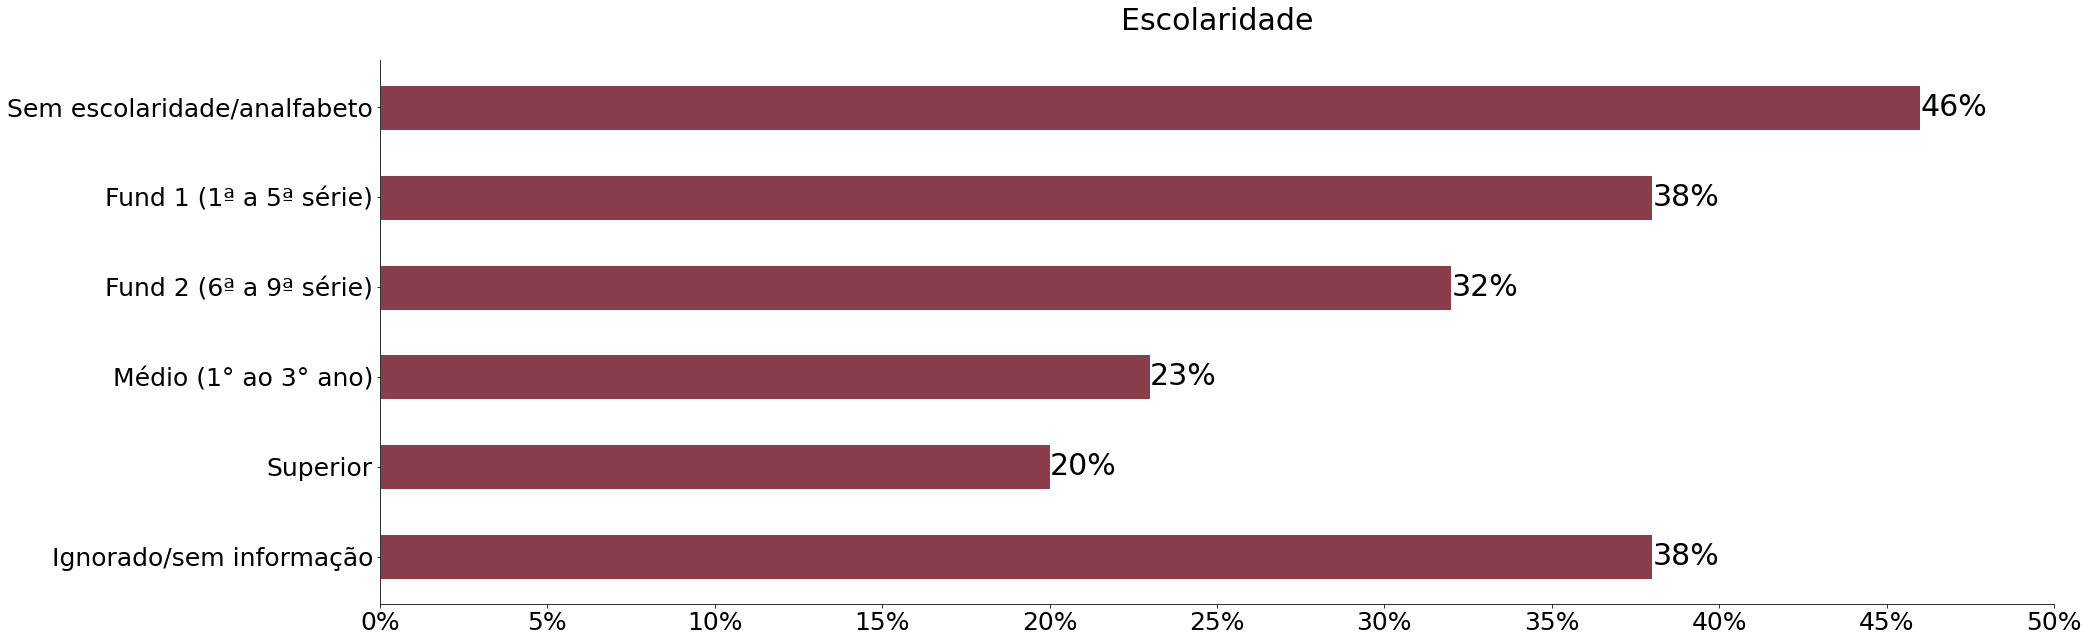

In [14]:
plt.figure(figsize=(30,10))
width=0.5
plt.barh(escolaridade,eixo_y,width,color='#8a3e4b',edgecolor='white')
sns.despine()
plt.title('Escolaridade',fontsize=30,pad=30)
plt.xticks(np.arange(0,55,5),fontsize=25)
plt.yticks(fontsize=25)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_xticks()])
for index, value in enumerate(ordena['Evolucao']): 
    plt.text(value, index, 
             str(value)+'%', va='center',fontsize=30) 
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide12_Escolaridade.png',dpi=720,bbox_inches='tight')

In [15]:
filtrado = dados[['escolaridade','RacaCor','Classificacao final','Evolucao']]
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado['escolaridade'] = filtrado['escolaridade'].map({'Ignorado':'Ignorado/Sem informação','Não informado':'Ignorado/Sem informação','Fund 1º ciclo (1ª a 5ª série)':'Fund 1 (1ª a 5ª série)',
                                                        'Fund 2º   ciclo (6ª a9ª série)':'Fund 2 (6ª a 9ª série)','Médio (1º ao 3º ano)':'Médio (1° ao 3° ano)',
                                                        'Sem escolaridade/Analfabeto':'Sem escolaridade/Analfabeto','Superior':'Superior'})
filtrado

,escolaridade,RacaCor,Classificacao final,Evolucao
11,Ignorado/Sem informação,Branca,COVID-19,Cura
17,Superior,Branca,COVID-19,Cura
18,Ignorado/Sem informação,Branca,COVID-19,Cura
19,Superior,Branca,COVID-19,Cura
23,Ignorado/Sem informação,Branca,COVID-19,Cura
...,...,...,...,...
168335,NaN,Branca,COVID-19,Óbito
168336,NaN,Branca,COVID-19,Óbito
168337,NaN,Branca,COVID-19,Óbito
168338,NaN,Branca,COVID-19,Óbito


In [16]:
numeradorRaca = filtrado.loc[filtrado['Evolucao']=='Óbito']
numeradorRaca = numeradorRaca.groupby('RacaCor').count()
numeradorRaca

,escolaridade,Classificacao final,Evolucao
RacaCor,,,
Amarela,57,108,108
Branca,18487,32195,32195
Ignorada,1466,2968,2968
Indígena,38,63,63
Parda,1005,1632,1632
Preta,1090,1825,1825


In [17]:
denominadorRaca = filtrado
denominadorRaca['Evolucao'] = denominadorRaca['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'})
denominadorRaca = denominadorRaca.loc[denominadorRaca['Evolucao']=='Óbito/Cura']
denominadorRaca = denominadorRaca.groupby('RacaCor').count()
denominadorRaca

,escolaridade,Classificacao final,Evolucao
RacaCor,,,
Amarela,157,298,298
Branca,58495,98435,98435
Ignorada,3686,7755,7755
Indígena,168,239,239
Parda,2818,4525,4525
Preta,2891,4654,4654


In [18]:
calculoRaca = numeradorRaca['Evolucao']/denominadorRaca['Evolucao']*100
calculoRaca = calculoRaca.to_frame()
calculoRaca = calculoRaca.reset_index()
calculoRaca['RacaCor'] = calculoRaca['RacaCor'].map({'Amarela':'Amarela','Branca':'Branca','Ignorada':'Ignorado/Sem informação','Indígena':'Indígena','Parda':'Parda','Preta':'Preta'})
calculoRaca

,RacaCor,Evolucao
0,Amarela,36.241611
1,Branca,32.706862
2,Ignorado/Sem informação,38.272083
3,Indígena,26.359833
4,Parda,36.066298
5,Preta,39.213580


In [19]:
ordenaRaca = calculoRaca.copy()
ordenaRaca.loc[0] = calculoRaca.loc[2]
ordenaRaca.loc[1] = calculoRaca.loc[3]
ordenaRaca.loc[2] = calculoRaca.loc[1]
ordenaRaca.loc[3] = calculoRaca.loc[0]
ordenaRaca.loc[4] = calculoRaca.loc[4]
ordenaRaca.loc[5] = calculoRaca.loc[5]
ordenaRaca['Evolucao'] = round(ordenaRaca['Evolucao'],0)
ordenaRaca['Evolucao'] = ordenaRaca['Evolucao'].astype(int)
ordenaRaca['RacaCor'] = ordenaRaca['RacaCor'].map({'Ignorado/Sem informação':'Ignorado/sem informação','Indígena':'Indígena','Branca':'Branca','Amarela':'Amarela',
                                                                 'Parda':'Parda','Preta':'Preta'})
ordenaRaca

,RacaCor,Evolucao
0,Ignorado/sem informação,38
1,Indígena,26
2,Branca,33
3,Amarela,36
4,Parda,36
5,Preta,39


In [20]:
raca = ordenaRaca['RacaCor']

In [21]:
eixo_y_RacaCor = ordenaRaca['Evolucao']

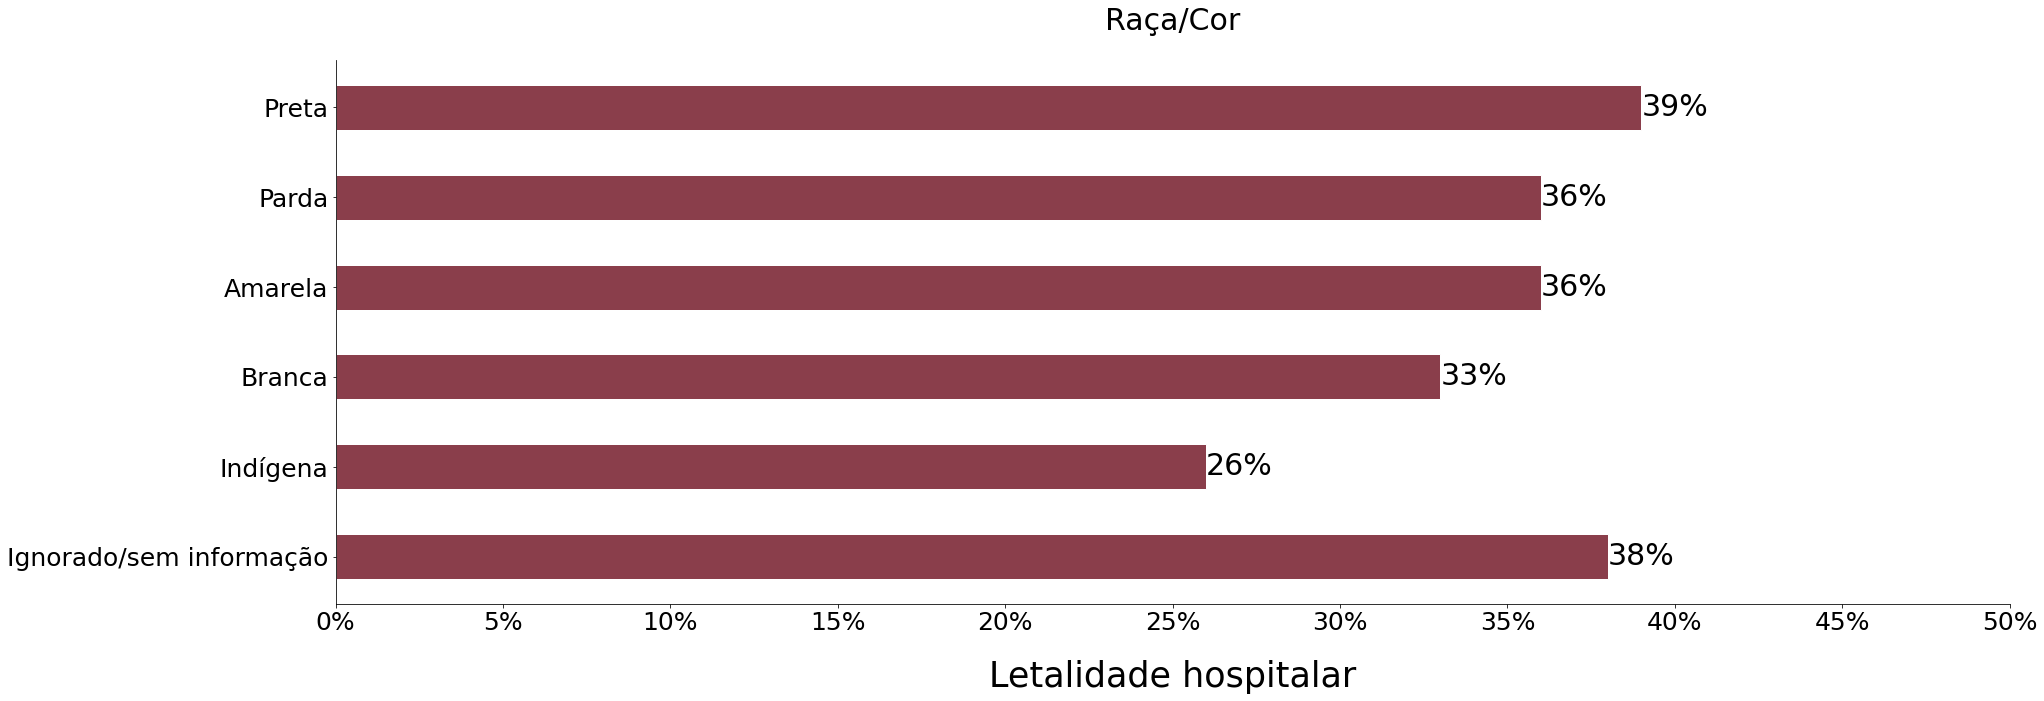

In [22]:
plt.figure(figsize=(30,10))
width=0.5
plt.barh(raca,eixo_y_RacaCor,width,color='#8a3e4b',edgecolor='white')
sns.despine()
plt.title('Raça/Cor',fontsize=30,pad=30)
plt.xlabel(r'Letalidade hospitalar',fontsize=35,labelpad=25)
plt.xticks(np.arange(0,55,5),fontsize=25)
plt.yticks(fontsize=25)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_xticks()])
for index, value in enumerate(ordenaRaca['Evolucao']): 
    plt.text(value, index, 
             str(value)+'%', va='center',fontsize=30) 
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide12_RacaCor.png',dpi=720,bbox_inches='tight')